### 1. Print the frequency table of fuelType

In [47]:
import os
os.chdir('/home/janaki/Pandas')
import pandas as pd
cars = pd.read_csv('Toyota.csv',index_col=0,na_values=['??'])

### 2. Print the frequency table of Automatic

In [2]:
pd.crosstab(index = cars['FuelType'],columns='count',dropna=True)

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1177


### 3. What is the frequency distribution of gearbox types with respect to different fuel types of the cars?

In [3]:
pd.crosstab(index = cars['Automatic'],columns= cars['FuelType'],dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1104
1,0,0,73


### 4. What is the probability of a car having fuel as CNG and manual gearbox?

In [4]:
pd.crosstab(index = cars['Automatic'],columns= cars['FuelType'],normalize=True,dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011228,0.107784,0.826347
1,0.000000,0.000000,0.054641


### 5. What is the Marginal probability distribution of gearbox types with respect to different fuel types of the cars?

In [46]:
pd.crosstab(index = cars['Automatic'],columns= cars['FuelType'],margins=True,normalize=True,dropna=True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011228,0.107784,0.826347,0.945359
1,0.000000,0.000000,0.054641,0.054641
All,0.011228,0.107784,0.880988,1.000000


### 6. Given gearbox type of a car as automatic what is the probability of car having FuelType as petrol?


In [6]:
# conditional probability
pd.crosstab(index = cars['Automatic'],columns= cars['FuelType'],margins=True,dropna=True,normalize='index')

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011876,0.114014,0.874109
1,0.000000,0.000000,1.000000
All,0.011228,0.107784,0.880988


### 7. Find the pair of attributes having positive correlation

In [7]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 123.4+ KB


In [8]:
cars['KM'].value_counts()

??        15
1          8
59000      7
43000      7
36000      7
          ..
99323      1
63451      1
104150     1
101159     1
41273      1
Name: KM, Length: 1256, dtype: int64

In [50]:
mean_val = cars['KM'].mean()
cars['KM'].fillna(mean_val,inplace=True)

In [51]:
cars['KM'] = cars['KM'].astype(float)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 123.4+ KB


In [12]:
numeric = cars.select_dtypes(exclude=[object])

In [13]:
numeric.corr()

,Price,Age,KM,MetColor,Automatic,CC,Weight
Price,1.000000,-0.878407,-0.568249,0.112041,0.033081,0.165067,0.581198
Age,-0.878407,1.000000,0.503937,-0.099659,0.032573,-0.120706,-0.464299
KM,-0.568249,0.503937,1.000000,-0.098638,-0.080260,0.291873,-0.035009
MetColor,0.112041,-0.099659,-0.098638,1.000000,-0.013973,0.029189,0.057142
Automatic,0.033081,0.032573,-0.080260,-0.013973,1.000000,-0.069321,0.057249
CC,0.165067,-0.120706,0.291873,0.029189,-0.069321,1.000000,0.651450
Weight,0.581198,-0.464299,-0.035009,0.057142,0.057249,0.651450,1.000000


### 8. Sort the cars based on Price and find the average of numeric attributes based on number of doors

In [30]:
cars.sort_values(by="Price", ascending=False).head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,NaN,1.0,NaN,116,0.0,0,2000,5,1480
111,31275,4.0,1500.0,Diesel,116,1.0,0,2000,5,1480
110,31000,4.0,4000.0,Diesel,116,1.0,0,2000,5,1480
115,24990,8.0,6000.0,Diesel,90,1.0,0,2000,5,1280
113,24950,8.0,13253.0,Diesel,116,1.0,0,2000,5,1320


In [31]:
### 9. Sort by color and then Price
cars.sort_values(by=['MetColor',"Price"], ascending=False).head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
111,31275,4.0,1500.0,Diesel,116,1.0,0,2000,5,1480
110,31000,4.0,4000.0,Diesel,116,1.0,0,2000,5,1480
115,24990,8.0,6000.0,Diesel,90,1.0,0,2000,5,1280
112,24950,8.0,0.0,Diesel,116,1.0,0,2000,5,1320
113,24950,8.0,13253.0,Diesel,116,1.0,0,2000,5,1320


### Group the cars by Doors

In [32]:
g1 = cars.groupby('Doors')

In [33]:
for CC,Automatic in g1:
    print(CC,Automatic)

2       Price   Age        KM FuelType  HP  MetColor  Automatic    CC Doors  \
761    8250  65.0   80000.0   Petrol  86       1.0          0  1300     2   
1078   7950  71.0  139145.0   Diesel  73       0.0          0  2000     2   

      Weight  
761     1015  
1078    1115  
3       Price   Age       KM FuelType  HP  MetColor  Automatic    CC Doors  \
1     13750  23.0  72937.0   Diesel  90       1.0          0  2000     3   
2     13950  24.0  41711.0   Diesel  90       NaN          0  2000     3   
3     14950  26.0  48000.0   Diesel  90       0.0          0  2000     3   
4     13750  30.0  38500.0   Diesel  90       0.0          0  2000     3   
5     12950  32.0  61000.0   Diesel  90       0.0          0  2000     3   
...     ...   ...      ...      ...  ..       ...        ...   ...   ...   
1430   8450  80.0  23000.0   Petrol  86       0.0          0  1300     3   
1431   7500   NaN  20544.0   Petrol  86       1.0          0  1300     3   
1432  10845  72.0      0.0   Petrol

In [34]:
g1.size()

Doors
2          2
3        621
4        137
5        673
five       1
four       1
three      1
dtype: int64

In [55]:
g1.aggregate('mean')

,Price,Age,KM,MetColor,Automatic,CC,Weight
Doors,,,,,,,
2,8100.000000,68.000000,109572.500000,0.500000,0.000000,1650.000000,1065.000000
3,10101.879227,58.428819,68718.455717,0.626151,0.057971,1537.373591,1057.581320
4,9725.430657,60.409836,71818.729927,0.704918,0.094891,1586.861314,1046.788321
5,11501.059435,52.355450,66461.208024,0.711039,0.044577,1588.939079,1091.179792
five,12950.000000,39.000000,34599.000000,1.000000,0.000000,1600.000000,1075.000000
four,20950.000000,14.000000,5278.000000,1.000000,1.000000,1600.000000,1150.000000
three,13500.000000,23.000000,46986.000000,1.000000,0.000000,2000.000000,1165.000000


### Visualize the distribution of Age of cars

/home/janaki/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

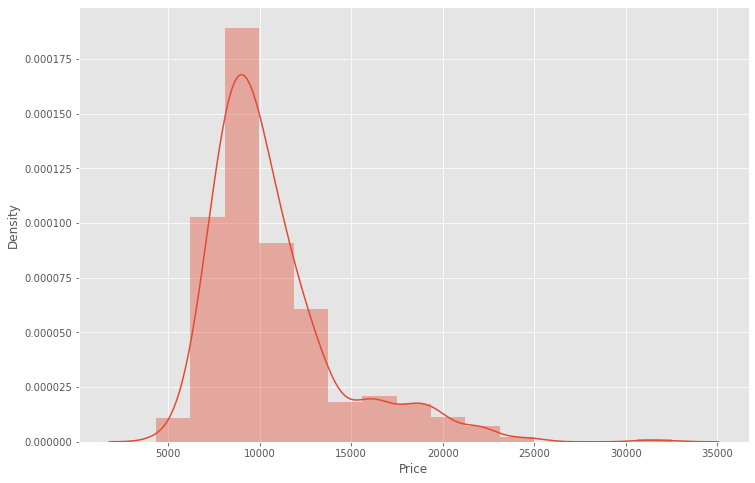

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.distplot(cars.Price,bins=15)

### 9. Visualize the correlation between different numeric attributes

<AxesSubplot:>

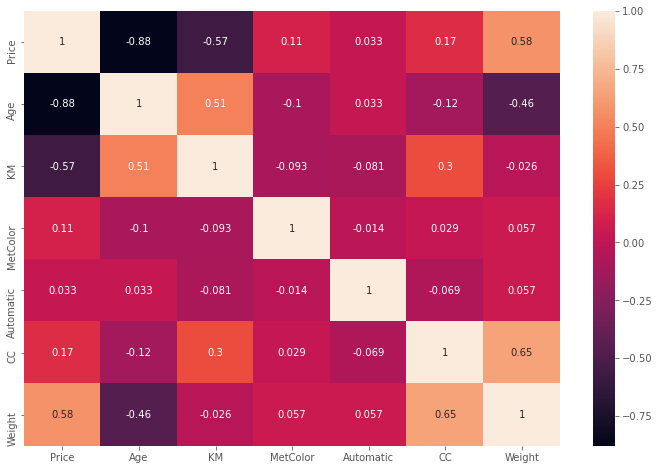

In [61]:
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cars.corr('pearson'),annot=True)

### 10. Visualize the distribution of Price

/home/janaki/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

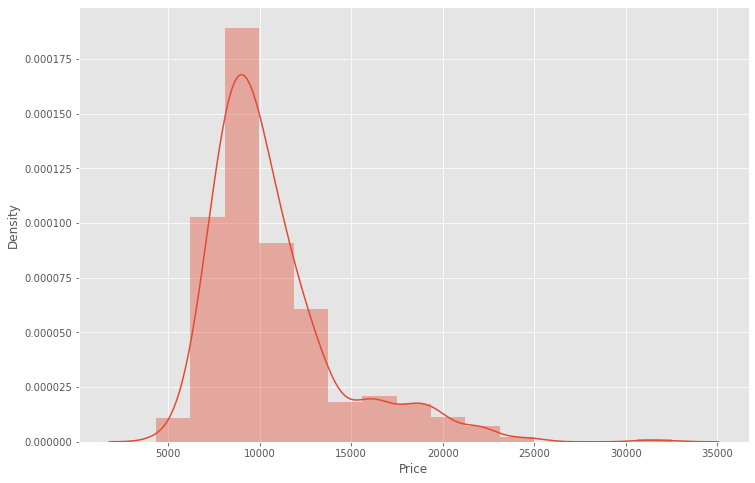

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.distplot(cars.Price,bins=15)

### Visualize the number of cars based on FuelType and  Gearbox

<AxesSubplot:xlabel='FuelType', ylabel='count'>

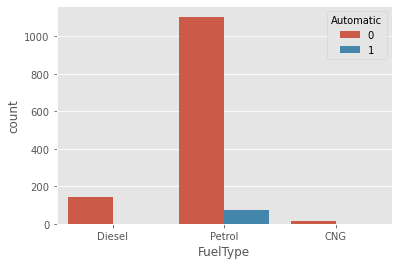

In [40]:
sns.countplot(x='FuelType',data = cars,hue='Automatic')

### Visualize the statistical measure of attribute Price

<AxesSubplot:xlabel='Price'>

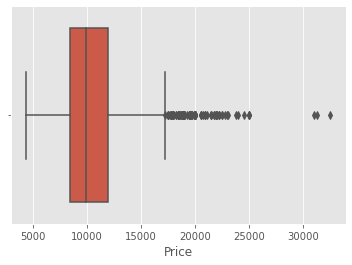

In [62]:
sns.boxplot(x=cars['Price'])

### Visualize the statistical measure of attribute Price with respect to FuelType

<AxesSubplot:xlabel='Price', ylabel='FuelType'>

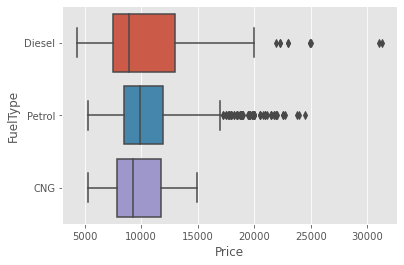

In [63]:
sns.boxplot(y = cars['FuelType'],x=cars['Price'],orient='h')

### Visualize the statistical measure of attribute Price with respect to FuelType group based on type of gearbox

<AxesSubplot:xlabel='Price', ylabel='FuelType'>

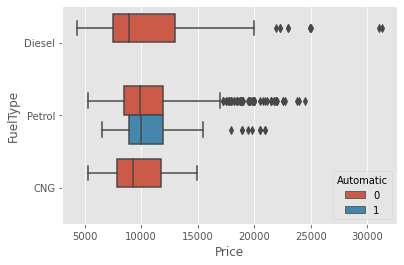

In [64]:
sns.boxplot(y = 'FuelType',x='Price',data = cars,orient ='h',hue='Automatic')